## Iris 데이터셋 t-SNE 이용하여 차원 축소

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import re

#### 데이터셋 불러오기

In [2]:
# 데이터 로드
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
target_names = iris.target_names

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### TSNE를 이용하여 차원 축소

/home/aibig30/anaconda3/envs/lecture/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/aibig30/anaconda3/envs/lecture/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/aibig30/anaconda3/envs/lecture/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/aibig30/anaconda3/envs/lecture/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


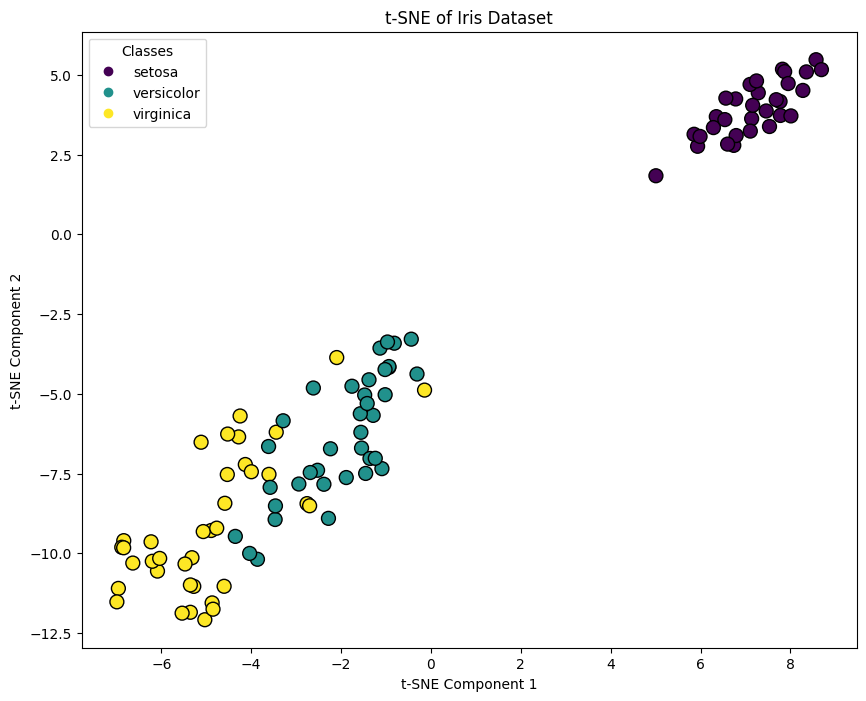

In [3]:
# t-SNE 변환 (2개 차원)
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# t-SNE 후 데이터 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=100)
handles, labels = scatter.legend_elements(prop="colors")
labels = [target_names[int(re.sub(r'[^0-9]', '',label))] for label in labels]
plt.legend(handles, labels, title="Classes")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Iris Dataset')
plt.show()

#### SVM 모델 학습 및 평가(기존 / t-sne적용 후)

In [4]:
# SVM 모델 학습 (t-SNE 없이)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 모델 예측 (t-SNE 없이)
y_pred = svm.predict(X_test)

# 평가 (t-SNE 없이)
print("Evaluation without t-SNE")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Evaluation without t-SNE
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [5]:
# SVM 모델 학습 (t-SNE 적용)
svm_tsne = SVC(kernel='linear')
svm_tsne.fit(X_train_tsne, y_train)

# 모델 예측 (t-SNE 적용)
y_pred_tsne = svm_tsne.predict(X_test_tsne)

# 평가 (t-SNE 적용)
print("Evaluation with t-SNE")
print(confusion_matrix(y_test, y_pred_tsne))
print(classification_report(y_test, y_pred_tsne))

Evaluation with t-SNE
[[ 0  5 14]
 [ 9  1  3]
 [13  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.17      0.08      0.11        13
           2       0.00      0.00      0.00        13

    accuracy                           0.02        45
   macro avg       0.06      0.03      0.04        45
weighted avg       0.05      0.02      0.03        45



#### 모델 학습 결과 시각화

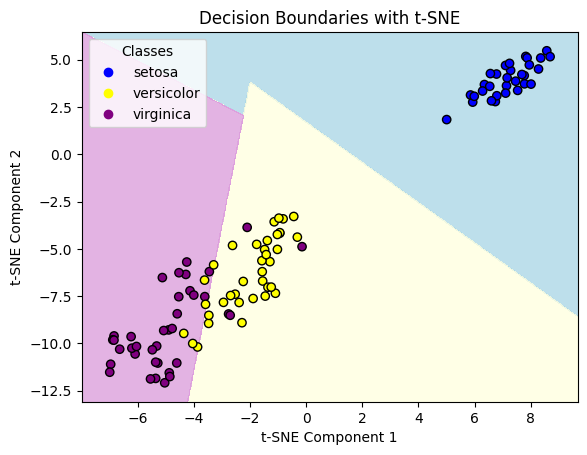

In [6]:
# 결정 경계 시각화 함수
def plot_decision_boundaries(X, y, model, target_names, title='Decision Boundaries'):
    # Create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary by assigning a color to each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue', 'lightyellow', 'plum')))

    # Plot also the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('blue', 'yellow', 'purple')))
    handles, labels = scatter.legend_elements(prop="colors")
    labels = [target_names[int(re.sub(r'[^0-9]', '',label))] for label in labels]
    plt.legend(handles, labels, title="Classes")
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(title)
    plt.show()

# 결정 경계 시각화
plot_decision_boundaries(X_train_tsne, y_train, svm_tsne, target_names, title='Decision Boundaries with t-SNE')